In [ ]:
import pandas as pd
from matplotlib import pyplot as plt

from ccb.experiment import parse_results
from ccb.experiment.retrieve_runs import retrieve_runs, find_missing_runs

%load_ext autoreload
%autoreload 2

## observations
* val loss and val accuracy don't start at the same step. Why?
* val accuracy can decrease over time (it doesn't always stay flat). Maybe it's a better indicator of the best hyper-parameter and the best time step.
* Val accuracy is particularly noisy
* many curves overfits right from the beginning and so2sat almost exclusively overfits
* conv4 is often not converged


In [ ]:
# directory where all the sweeps experiments are logged
classification_dir =  '/mnt/data/experiments/nils/new_classification_seeded_runs'
segmentation_dir =  '/mnt/data/experiments/nils/new_segmentation_sweeps'

df = retrieve_runs(classification_dir, use_cached_csv=False, exp_type="seeds")

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]

Error in callback <function install_repl_displayhook.<locals>.post_execute at 0x7fb62116a550> (for post_execute):


KeyboardInterrupt: 

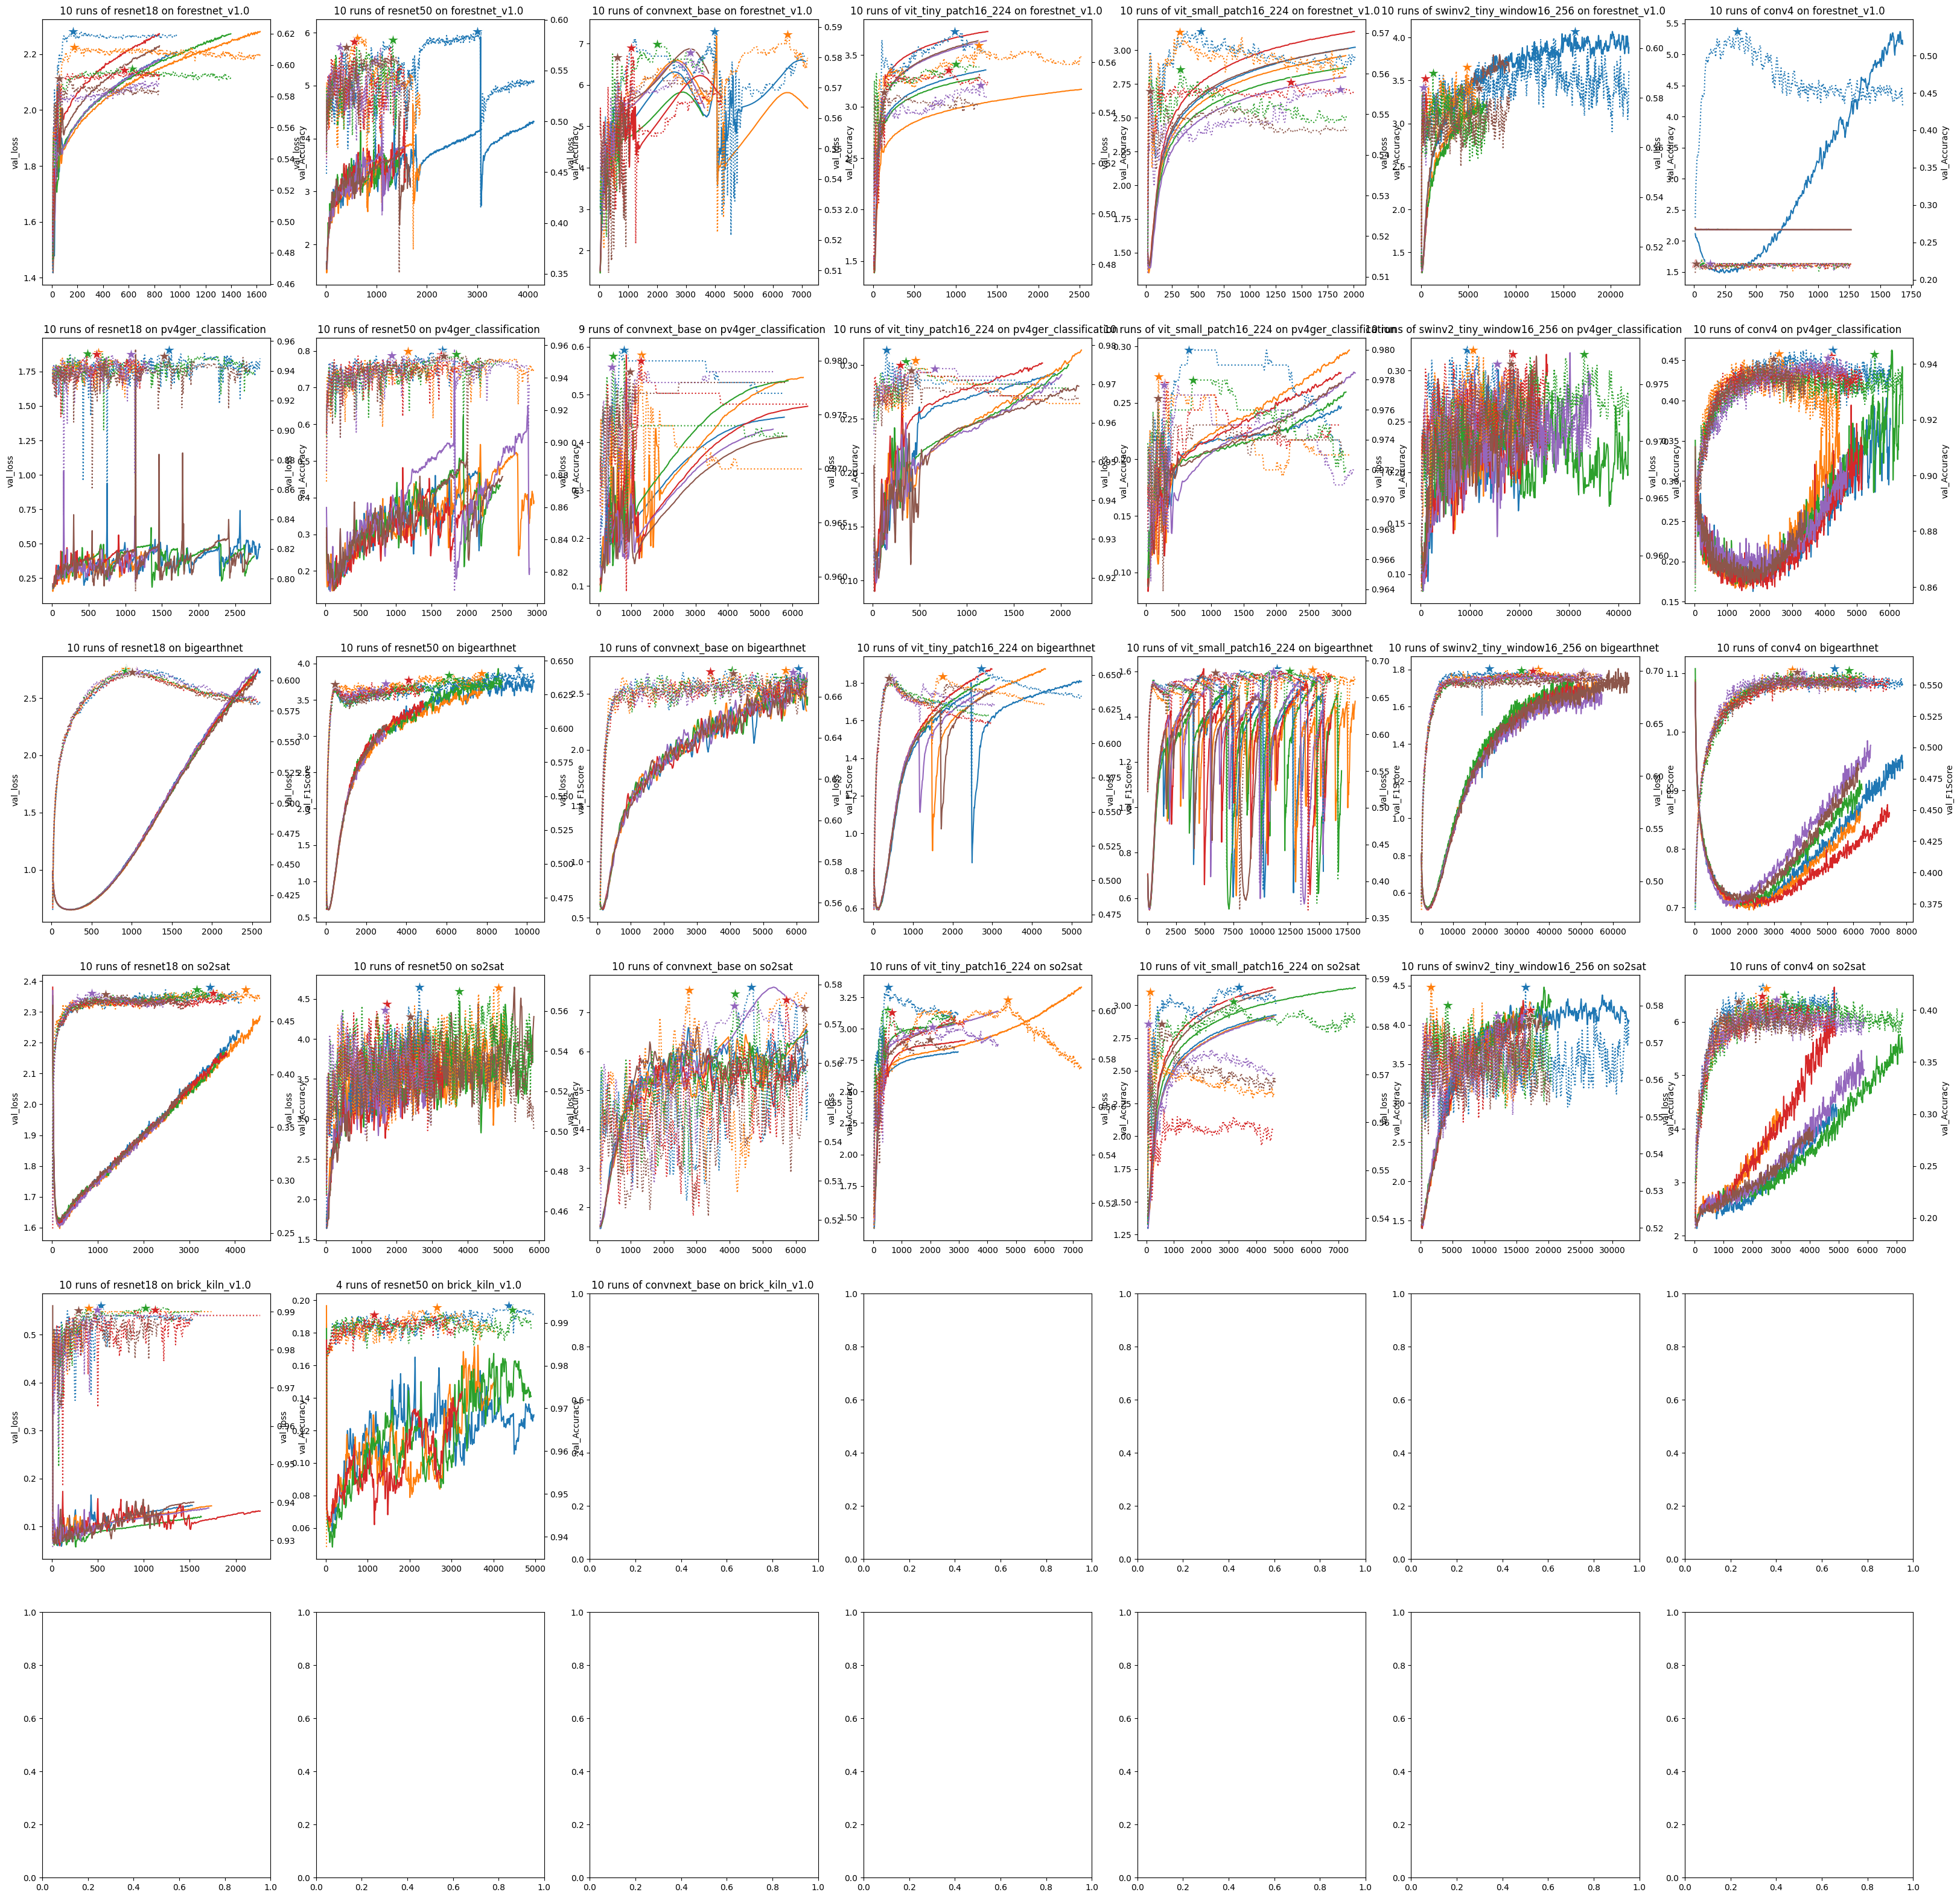

In [11]:

df_1x = df[(df["partition_name"] == "1.00x_train") | (df["partition_name"] == "default")]

# df_05x = df[df["partition_name"]=="0.01x_train"]
parse_results.plot_all_models_datasets(df_1x, plot_fn=parse_results.make_plot_sweep(filt_size=5, top_k=6, legend=False), fig_size=(40,40))
plt.tight_layout()


In [ ]:

# plt.rcParams['figure.figsize'] = [40, 40]

parse_results.plot_all_datasets(df_1x, model="ssl_moco_resnet50", plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=True), fig_size=(10,20))
# parse_results.plot_all_datasets(df_1x, model="resnet50")

plt.tight_layout()


In [ ]:
parse_results.plot_all_models_datasets(df_1x, plot_fn=parse_results.make_plot_sweep(filt_size=20, top_k=6, legend=False), fig_size=(40,40))
plt.tight_layout()

In [ ]:
count_df = df.groupby(["model", "dataset", "partition_name"]).size().reset_index()



In [ ]:
count_df[count_df["model"].str.contains("ssl_moco")]

In [ ]:
d = find_missing_runs(df, 10, "segmentation")

In [ ]:
import json
print(json.dumps(d, indent = 4))

In [ ]:
from pathlib import Path
df.to_csv(Path(classification_dir) / "cached_results.csv")

In [ ]:
import numpy as np
trace = pd.Series(np.linspace(0,1,1000))
print(trace.mean())
print(trace.rolling(5).sum().mean())
print(trace.rolling(5).mean().mean())
print(trace.rolling(5, win_type="gaussian").mean(std=0.1).mean())
print(trace.rolling(5, win_type="gaussian").mean(std=0.5).mean())
print(trace.rolling(5, win_type="gaussian").mean(std=10).mean())

